# Project Overview

The Trump Administration has put forward a proposal to change some of the requirements for H1B visa application. H1B visa is one of the most common way foreign nationals get to work in American companies. In this project, I am going to explore the salaries of Software Engineers in the United States and try to see how this change is going to affect non-immigrant Software Engineers working in the US. This effect on non-immigrant Software Engineers might also help us see how Tech companies (big and small) are going to be affected by this rule.

# Problem Description
With the new possible changes to H1B visa application requirements, entry-level candidates must have  a salary that is 45th percentile of their profession's salary. Similarly, high-skilled candidates must have a salary that is 95th percentile of their profession's salary. These numbers are up from existing 17th percentile and 67th percentile for entry-level and high-skilled candidates respectively. This is going to curb the number of eligible candidates for H1B visa and overall create a negative sentiment among skilled foreign workers who have been major contributors in the field of science and technology being part of American companies. This, in turn, will affect American Tech companies which might suffer from brain drain in case this rule is implemented.

# Subject Matter Expertise
 
1. Data Analysis: I am using two different data sources to explore the recent amounts of salary of Software Engineers in the United States. The first dataset is from StackOverflow Survey 2020 and the second dataset is web-scraped from Glassdoor website for Software Engineer salaries. Then, I am going to compare how the rule change will result in groups of Software Engineers who will be affected by the new rule implementation. In addition to this, I am going to explore the 2019 H1B dataset provided by the US government to see which companies hire most candidates in H1B visa, compare their average salaries and see how they will be affected.

2. Data Visualization: I will use two histograms to plot the salaries of Software Engineers based on two datasets (StackOverflow Survey Data and Glassdoor webscraped data). These histograms will have bins that are based on the old and new percentile values of Software Engineer Salaries. I will use a bar chart to show the entry-level Software Engineer salaries and senior-level Software Engineer salaries of companies that were awarded highest number of H1B visas in 2019.

3. Statistics and Probability: For two datasets that are the salaries for Software Engineers, I will calculate the 17th, 45th, 67th, and 95th percentile values. These will be used for visualization as well as later to compare with the salaries of the companies that were awarded most H1B visas in 2019. In addition, I will also calculate the percent of Software Engineers who will be affected based on two different datasets and see if both of them are conforming.

4. Hypothesis Testing: I will test the hypothesis by calculating the percent of Software Engineers who will be affected by the new rule implementation.

# Assumptions
The assumption is that half of the entire American Software Engineer workforce that need H1B visas will be affected by the new rule implementation.

One generalization that I am making is that the distribution of salaries of non-immigrant SWEs in the US is the same as overall distribution.


# Steps to Explore the Topic and Problem

1. Download H1B employers data from USCIS website
2. Web-scrape data from Glassdoor for Software Engineer Salaries in the US and store it in sample_salaries_one.csv file.
3. Download data from Stackoverflow Survey 2020 consisting of Software Engineer total compensation from all around the world
4. Filter Stackoverflow data to have only rows relating to United States and that have total compensation stated explicitly. Filter ourlier salary values.
5. Calculate the 17th, 45th, 67th, and 95th percentile of salaries of Software Engineers in the US from the Stackoverflow survey data
6. Filter Glassdoor data for outliers. 
7. Calculate the 17th, 45th, 67th, and 95th percentile of salaries of Software Engineers.
8. Calcualte the percent of Software Engineers that will be affected  using both datasets. Compare the values obtained from both datasets to see if they are consistent.
9. Manually extract data from LinkedIn Salaries to get the average salaries of SWEs and senior-SWEs in companies that obtained the highest number of H1B candidates in 2019.
10. Use the calculated salary percentile values to see which companies get affected with new rule implementation.

# Data Sources:

1. H1B Employers Data 2019 from USCIS official website: 'https://www.uscis.gov/tools/reports-and-studies/h-1b-employer-data-hub/h-1b-employer-data-hub-files'
2. Stack Overflow Survey 2020: 'https://insights.stackoverflow.com/survey/2020'
3. Glassdoor web-scraped Software Engineer salaries. Available in sample_salaries_one.csv file.
4. LinkedIn Salaries manually extracted data for average salaries of SWEs in top H1B offered companies.

# Data Exploration

In [89]:
#imports
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [90]:
so = pd.read_csv("stackoverflow_survey_results_public.csv")
so


,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [91]:
so_filtered = so.filter(items= ["CompFreq", "CompTotal", "ConvertedComp", "Country"])
so_filtered

,CompFreq,CompTotal,ConvertedComp,Country
0,Monthly,NaN,NaN,Germany
1,NaN,NaN,NaN,United Kingdom
2,NaN,NaN,NaN,Russian Federation
3,NaN,NaN,NaN,Albania
4,NaN,NaN,NaN,United States
...,...,...,...,...
64456,NaN,NaN,NaN,United States
64457,NaN,NaN,NaN,Morocco
64458,NaN,NaN,NaN,Viet Nam
64459,NaN,NaN,NaN,Poland


In [92]:
so_usa = so_filtered[so.Country == "United States"]
so_usa = so_usa[so.CompTotal.isna() == False]
so_usa

,CompFreq,CompTotal,ConvertedComp,Country
7,Yearly,116000.0,116000.0,United States
13,Yearly,66000.0,66000.0,United States
16,Yearly,79000.0,79000.0,United States
17,Monthly,105000.0,1260000.0,United States
18,Yearly,83400.0,83400.0,United States
...,...,...,...,...
64116,Yearly,150000.0,150000.0,United States
64122,Yearly,70000.0,70000.0,United States
64127,Yearly,140000.0,140000.0,United States
64129,Weekly,3000.0,150000.0,United States


In [93]:
# Since I see that monthly and weekly fillings of salaries have discrepancies, I am going to get rid of them as they do not make up for a large portion of the dataset. A small sacrifice for consistency's sake.
so_usa_yearly = so_usa[so_usa.CompFreq == "Yearly"]
so_usa_yearly

# Further data filtering is needed as there are outliers in the data

,CompFreq,CompTotal,ConvertedComp,Country
7,Yearly,116000.0,116000.0,United States
13,Yearly,66000.0,66000.0,United States
16,Yearly,79000.0,79000.0,United States
18,Yearly,83400.0,83400.0,United States
40,Yearly,106000.0,106000.0,United States
...,...,...,...,...
64113,Yearly,225000.0,225000.0,United States
64116,Yearly,150000.0,150000.0,United States
64122,Yearly,70000.0,70000.0,United States
64127,Yearly,140000.0,140000.0,United States


In [94]:
so_usa_yearly = so_usa_yearly.sort_values(by="CompTotal", ascending=True, ignore_index=True)
so_usa_yearly

,CompFreq,CompTotal,ConvertedComp,Country
0,Yearly,0.0,0.0,United States
1,Yearly,0.0,0.0,United States
2,Yearly,0.0,0.0,United States
3,Yearly,0.0,0.0,United States
4,Yearly,0.0,0.0,United States
...,...,...,...,...
7343,Yearly,1250000.0,1250000.0,United States
7344,Yearly,1500000.0,1500000.0,United States
7345,Yearly,1500000.0,1500000.0,United States
7346,Yearly,1560000.0,1560000.0,United States


In [95]:
so_usa_yearly.head(100)

,CompFreq,CompTotal,ConvertedComp,Country
0,Yearly,0.0,0.0,United States
1,Yearly,0.0,0.0,United States
2,Yearly,0.0,0.0,United States
3,Yearly,0.0,0.0,United States
4,Yearly,0.0,0.0,United States
...,...,...,...,...
95,Yearly,29000.0,29000.0,United States
96,Yearly,30000.0,30000.0,United States
97,Yearly,30000.0,30000.0,United States
98,Yearly,30000.0,30000.0,United States


In [96]:
so_usa_yearly = so_usa_yearly[so_usa_yearly["CompTotal"] >= 30000]
so_usa_yearly

,CompFreq,CompTotal,ConvertedComp,Country
96,Yearly,30000.0,30000.0,United States
97,Yearly,30000.0,30000.0,United States
98,Yearly,30000.0,30000.0,United States
99,Yearly,30000.0,30000.0,United States
100,Yearly,30000.0,30000.0,United States
...,...,...,...,...
7343,Yearly,1250000.0,1250000.0,United States
7344,Yearly,1500000.0,1500000.0,United States
7345,Yearly,1500000.0,1500000.0,United States
7346,Yearly,1560000.0,1560000.0,United States


In [97]:
so_usa_yearly.tail(100)

,CompFreq,CompTotal,ConvertedComp,Country
7248,Yearly,400000.0,400000.0,United States
7249,Yearly,400000.0,400000.0,United States
7250,Yearly,400000.0,400000.0,United States
7251,Yearly,400000.0,400000.0,United States
7252,Yearly,400000.0,400000.0,United States
...,...,...,...,...
7343,Yearly,1250000.0,1250000.0,United States
7344,Yearly,1500000.0,1500000.0,United States
7345,Yearly,1500000.0,1500000.0,United States
7346,Yearly,1560000.0,1560000.0,United States


In [98]:
# Filter high tail values
# Considering more than one million as outlier salaries
so_usa_yearly = so_usa_yearly[so_usa_yearly["CompTotal"] <= 1000000]
so_usa_yearly

,CompFreq,CompTotal,ConvertedComp,Country
96,Yearly,30000.0,30000.0,United States
97,Yearly,30000.0,30000.0,United States
98,Yearly,30000.0,30000.0,United States
99,Yearly,30000.0,30000.0,United States
100,Yearly,30000.0,30000.0,United States
...,...,...,...,...
7336,Yearly,822500.0,822500.0,United States
7337,Yearly,1000000.0,1000000.0,United States
7338,Yearly,1000000.0,1000000.0,United States
7339,Yearly,1000000.0,1000000.0,United States


In [137]:
so_salaries = so_usa_yearly["CompTotal"]

def find_percentile_details(salaries, dataset, column_name):
    # Find the percentiles values
    percentile_17th = np.percentile(salaries, 17)
    percentile_45th = np.percentile(salaries, 45)
    percentile_67th = np.percentile(salaries, 67)
    percentile_95th = np.percentile(salaries, 95)

    print("Percentile 17: ", percentile_17th)
    print("Percentile 45: ", percentile_45th)
    print("Percentile 67: ", percentile_67th)
    print("Percentile 95: ", percentile_95th)
    print()

    # Counts of SWEs between different percentiles
    p0_p17 = dataset[column_name][dataset[column_name] < percentile_17th].count()
    p17_p45 = dataset[column_name][dataset[column_name] < percentile_45th].count() - p0_p17 
    p45_p67 = dataset[column_name][dataset[column_name] < percentile_67th].count() - p17_p45 - p0_p17
    p67_p95 = dataset[column_name][dataset[column_name] < percentile_95th].count() - p45_p67 - p17_p45 - p0_p17
    p95_p100 = dataset[column_name][dataset[column_name] >= percentile_95th].count() 

    print("Percentile 0 to 17 count: ", p0_p17)
    print("Percentile 17 to 45 count: ", p17_p45)
    print("Percentile 45 to 67 count: ", p45_p67)
    print("Percentile 67 to 95 count: ", p67_p95)
    print("Percentile 95 to 100 count: ", p95_p100)
    total_rows = p0_p17+p17_p45+p45_p67+p67_p95+p95_p100
    print("Total: ", total_rows)
    print()

    # Percentage of groups affected
    entry_level_affected = p17_p45 / total_rows * 100
    senior_level_affected = p67_p95 / total_rows * 100
    print("Entry level SWEs affected percent: ", entry_level_affected)
    print("Senior level SWEs affected percent: ", senior_level_affected)

    return (percentile_17th, percentile_45th, percentile_67th, percentile_95th)

percentile_17th, percentile_45th, percentile_67th, percentile_95th = find_percentile_details(so_salaries, so_usa_yearly, "CompTotal")


Percentile 17:  75000.0
Percentile 45:  107064.80000000002
Percentile 67:  135000.0
Percentile 95:  250000.0

Percentile 0 to 17 count:  1157
Percentile 17 to 45 count:  2103
Percentile 45 to 67 count:  1499
Percentile 67 to 95 count:  2098
Percentile 95 to 100 count:  388
Total:  7245

Entry level SWEs affected percent:  29.026915113871638
Senior level SWEs affected percent:  28.957902001380265


This data includes SWEs that are national as well as foreign. The basic assumption is that there is a similar distribution of salaries among foreign/non-immigrant SWEs as the overall distribution. The weird shaped histogram will show the frequencies and percentile distribution of SWE salaries at the same time.

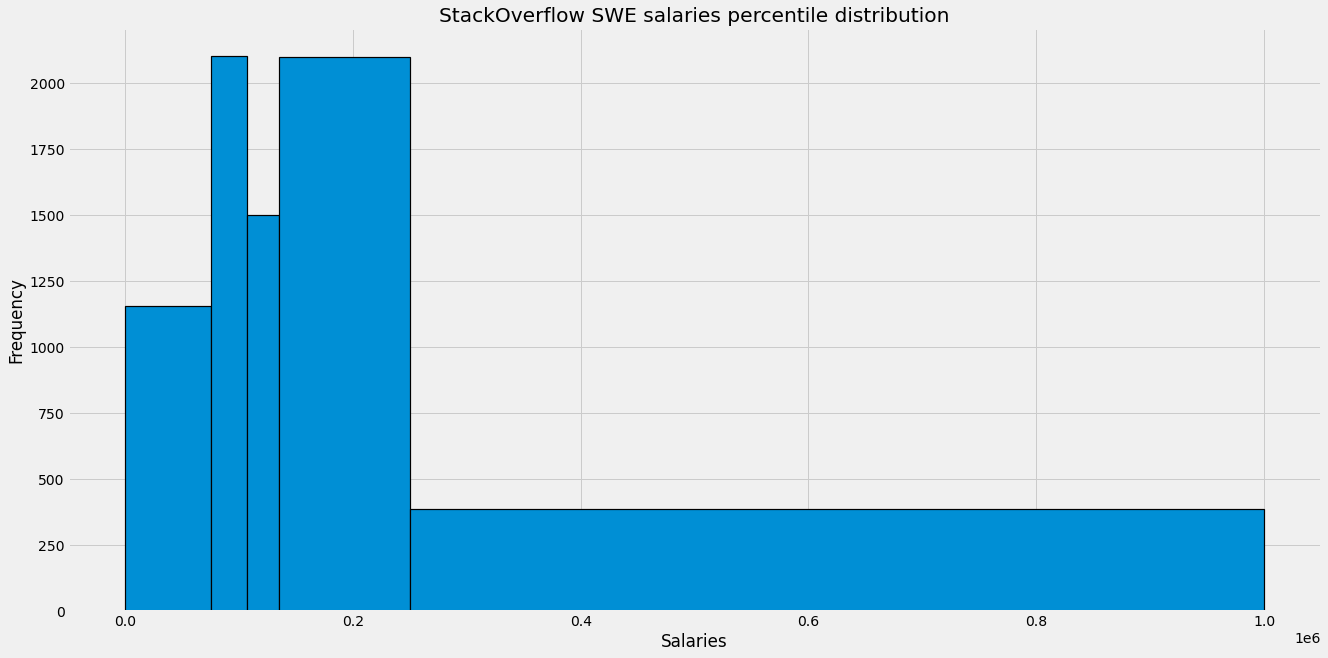

In [142]:
# A weird histogram with percentile bins

def plot_histogram(percentile_17th, percentile_45th, percentile_67th, percentile_95th, salary_col, title):
    plt.figure(figsize=(20,10))
    hist_bins = [0, percentile_17th, percentile_45th, percentile_67th, percentile_95th, max(salary_col)]
    plt.hist(salary_col, bins=hist_bins, edgecolor="black", linewidth=1.2)
    plt.title(title)
    plt.xlabel("Salaries")
    plt.ylabel("Frequency")
    plt.show()

plot_histogram(percentile_17th, percentile_45th, percentile_67th, percentile_95th, so_salaries, "StackOverflow SWE salaries percentile distribution")

In the histogram above, we can see that the affected bins make up for the highest number of SWEs in thee industry. Entry level SWEs that are affected make up for 29.03 percent of the entire workforce. Senior SWEs that are affected make up for 29.00 percent of the entire workforce. The total percent of SWEs affected will be 58.03. Again, this is in the general distribution that consists of foreign as well as national workforce.

# Glassdoor SWE salaries data

In [101]:
# Salaries obtained scraping the Glassdoor webpages for Software Engineer Salaries
glassdoor_salaries = pd.read_csv("sample_salaries_one.csv")
glassdoor_salaries["Salary"] = glassdoor_salaries["Salary"].sort_values(ignore_index=True)
glassdoor_salaries.head(250)

,Salary
0,15
1,17
2,20
3,20
4,20
...,...
245,8000
246,8082
247,8087
248,8127


In [102]:
glassdoor_salaries.head(260)

,Salary
0,15
1,17
2,20
3,20
4,20
...,...
255,9075
256,37498
257,42230
258,47082


The sorted salaries show that until first 255 values, the salaries are so low that they might be part-time salaries. So we need to get rid of them.
Note that this might change if I use a larger dataset, depending on the data change in Glassdoor website


In [124]:
glassdoor_salaries = glassdoor_salaries.iloc[256:].reset_index()
glassdoor_salaries.filter(items = ["Salary"])
glassdoor_salaries

,level_0,index,Salary
0,256,512,71167
1,257,513,71169
2,258,514,71178
3,259,515,71178
4,260,516,71181
...,...,...,...
2543,2799,3055,177223
2544,2800,3056,178261
2545,2801,3057,178331
2546,2802,3058,183709


In [140]:
# Calculate percentile related information for Glassdoor salaries

gd_percentile_17th, gd_percentile_45th, gd_percentile_67th, gd_percentile_95th = find_percentile_details(glassdoor_salaries["Salary"], glassdoor_salaries, "Salary")

Percentile 17:  78994.93
Percentile 45:  89936.6
Percentile 67:  98200.0
Percentile 95:  134001.50000000003

Percentile 0 to 17 count:  433
Percentile 17 to 45 count:  714
Percentile 45 to 67 count:  551
Percentile 67 to 95 count:  722
Percentile 95 to 100 count:  128
Total:  2548

Entry level SWEs affected percent:  28.021978021978022
Senior level SWEs affected percent:  28.335949764521196


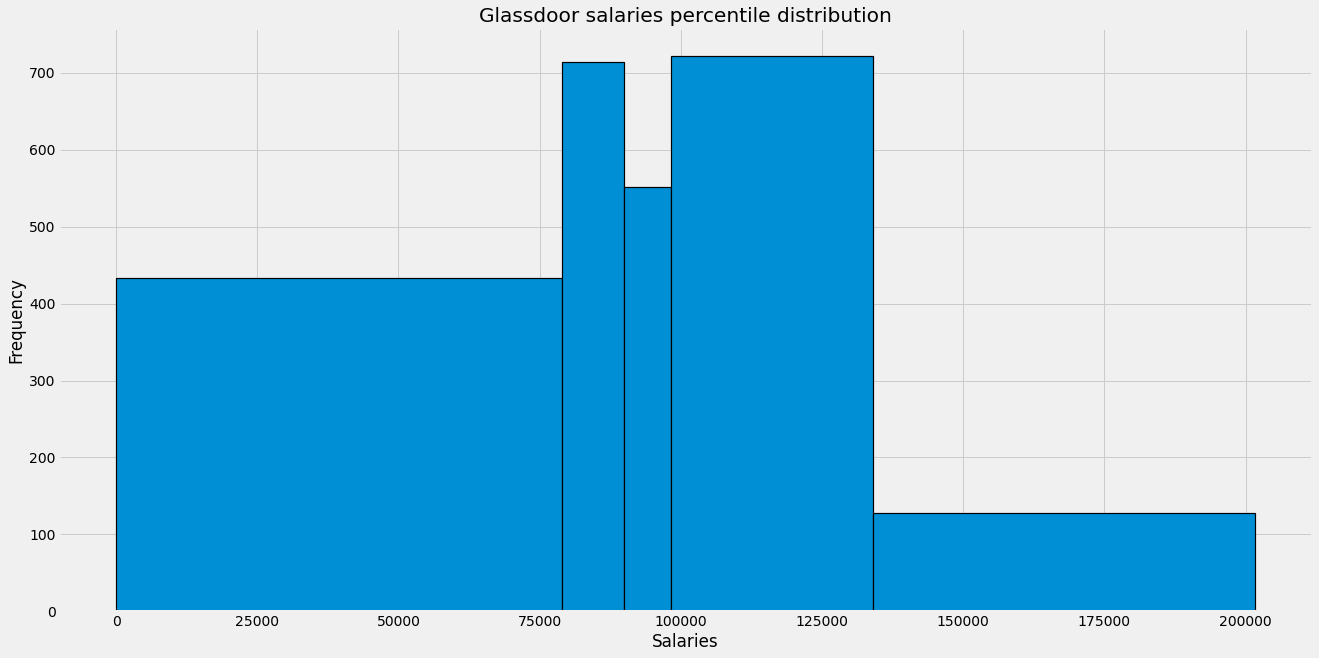

In [141]:
# Plot Glassdoor salaries histogram

plot_histogram(gd_percentile_17th, gd_percentile_45th, gd_percentile_67th, gd_percentile_95th, glassdoor_salaries["Salary"], "Glassdoor salaries percentile distribution")

We can see the similar distribution of salaries that we saw in StackOverflow survey results. The total percent of entry-level SWEs and senior-level SWEs affected are 28.02 and 28.34 respectively. The total percent that will be affected is 56.36. This is in line with what was observed in the StackOverflow survey results analysis above.

# H1B Employers Data

In [19]:
h1b = pd.read_csv("h1b_datahubexport-2019.csv")
h1b

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,Tax ID,State,City,ZIP
0,2019,SOUTHERN CARPET HARDWOOD & TILE IN,1,0,0,0,23,NaN,AL,BIRMINGHAM,35209.0
1,2019,UAB HEALTH SYSTEM,0,0,0,1,56,NaN,AL,BIRMINGHAM,35233.0
2,2019,BIRMINGHAM VA MEDICAL CENTER,0,0,1,0,62,NaN,AL,BIRMINGHAM,35233.0
3,2019,GESTAMP ALABAMA LLC,1,0,0,0,33,NaN,AL,MC CALLA,35111.0
4,2019,ARKANSAS HEALTH GROUP,0,0,1,0,62,NaN,AR,LITTLE ROCK,72211.0
...,...,...,...,...,...,...,...,...,...,...,...
59436,2019,A-ZS GROUP INC,0,1,0,0,99,5806.0,NY,FLUSHING,11354.0
59437,2019,UNIVERSITY OF HAWAII,5,0,0,0,61,35.0,HI,HONOLULU,96822.0
59438,2019,UNIVERSITY OF HAWAII,19,0,32,1,61,354.0,HI,HONOLULU,96822.0
59439,2019,THE AMERICAN FOUNDATION FOR THE,0,0,1,0,81,1275.0,VA,WASHINGTON,22747.0


In [32]:
h1b_employer = h1b.filter(items= ["Employer", "Initial Approvals", "Initial Denials", "Continuing Approvals", "Continuing Denials"])
# Get uinque count of each employer
unique = h1b_employer["Employer"].value_counts()
unique.head(10)

CAPGEMINI AMERICA INC               43
AMAZON COM SERVICES INC             28
DELOITTE CONSULTING LLP             23
TATA CONSULTANCY SVCS LTD           19
APPLE INC                           19
ACCENTURE LLP                       18
GOOGLE LLC                          18
FACEBOOK INC                        17
TECH MAHINDRA AMERICAS INC          15
COGNIZANT TECH SOLUTIONS US CORP    15
Name: Employer, dtype: int64

The top employers of H1B candiadates are either IT/Tech Consulting companies or top tier techno brands like Amazon, Apple, Google, and Facebook.

We will manually check LinkedIn Salaries for the average salaries of Software Engineers and Senior Software Engineers in all relevant companies to make sense of the average impact. Here, I mean the average impact and it is going to be a very dirty estimate because the term "Senior Software Engineer" will itself be an opinionated position.

Since this was done manually, I have tried to make all the salaries of consistent standard across all companies. This is why I eliminated Accenture Llp and Deloitte Consulting Llp because I could not find consistent data for them.

In [143]:
top_h1b_linkedin_salaries = pd.read_csv("linkedin_software_engineer_salaries.csv")
top_h1b_linkedin_salaries

,Company,Software Engineer Salary,Senior Software Engineer Salary
0,Capgemini America Inc,75000,101000
1,Amazon Com Services Inc,170000,273000
2,Tata Consultancy Svcs Ltd,62800,101000
3,Apple Inc,200000,283000
4,Google Llc,205000,317000
5,Facebook Inc,234000,341000
6,Tech Mahindra Americas Inc,60900,84000
7,Cognizant Tech Solutions US Corp,78700,93300


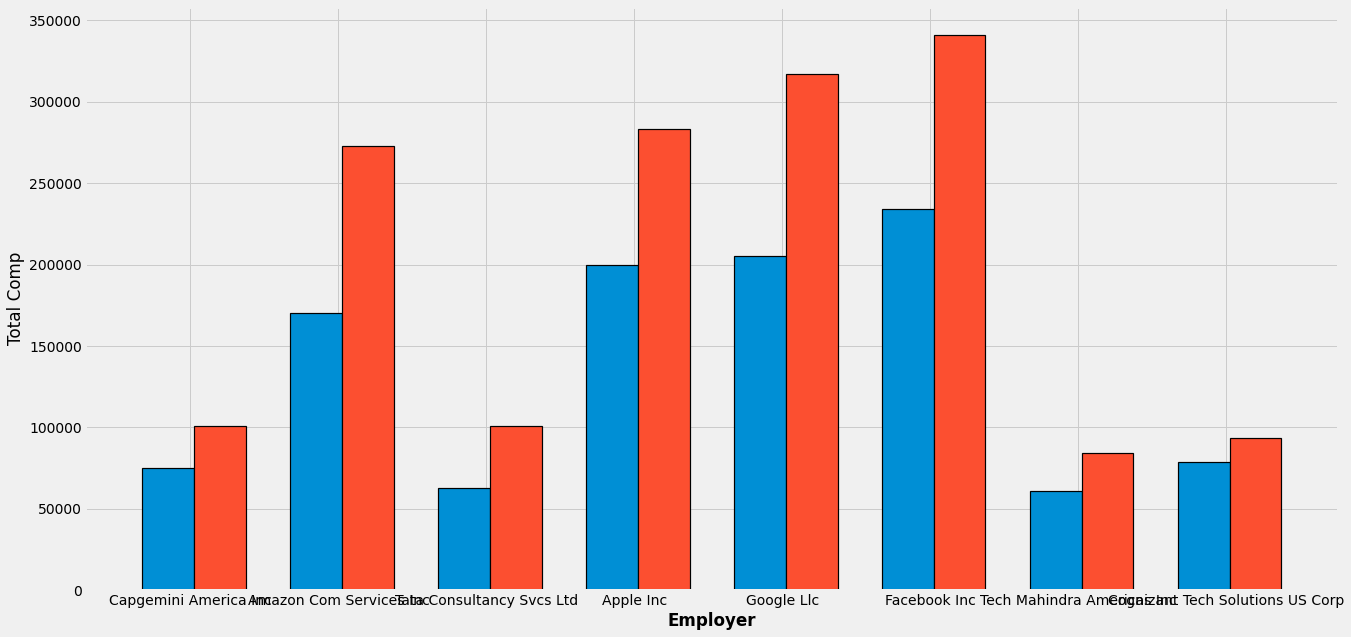

In [144]:
swe_salaries = top_h1b_linkedin_salaries["Software Engineer Salary"]
senior_swe_salaries = top_h1b_linkedin_salaries["Senior Software Engineer Salary"]

num_swe_salaries = len(swe_salaries)
num_senior_swe_salaries = len(senior_swe_salaries)

bar_width = 0.35

# positions in x-axis
r1 = np.arange(num_swe_salaries)
r2 = [x+bar_width for x in r1]

plt.figure(figsize=(20,10))
plt.bar(r1, swe_salaries, width=bar_width, edgecolor="black", linewidth=1.2, label="SWE")
plt.bar(r2, senior_swe_salaries, width=bar_width, edgecolor="black", linewidth=1.2, label="Senior SWE")

# Add xticks on the middle of the group bars
plt.xlabel('Employer', fontweight='bold')
plt.ylabel('Total Comp')
plt.xticks([r + 0.15 for r in range(len(top_h1b_linked_salaries["Company"]))], top_h1b_linked_salaries["Company"])

plt.show()

### Based on Stackoverflow percentile values

In [146]:
# Companies meeting 17th percentile salaries for entry level SWEs
entry_level_17 = top_h1b_linkedin_salaries[top_h1b_linkedin_salaries["Software Engineer Salary"] > percentile_17th]
entry_level_17


,Company,Software Engineer Salary,Senior Software Engineer Salary
1,Amazon Com Services Inc,170000,273000
3,Apple Inc,200000,283000
4,Google Llc,205000,317000
5,Facebook Inc,234000,341000
7,Cognizant Tech Solutions US Corp,78700,93300


In [148]:
# Companies meeting 45th percentile salaries for entry level SWEs
entry_level_45 = top_h1b_linkedin_salaries[top_h1b_linkedin_salaries["Software Engineer Salary"] > percentile_45th]
entry_level_45

,Company,Software Engineer Salary,Senior Software Engineer Salary
1,Amazon Com Services Inc,170000,273000
3,Apple Inc,200000,283000
4,Google Llc,205000,317000
5,Facebook Inc,234000,341000


In [149]:
# Companies meeting 67th percentile salaries for senior level SWEs
senior_level_67 = top_h1b_linkedin_salaries[top_h1b_linkedin_salaries["Senior Software Engineer Salary"] > percentile_67th]
senior_level_67

,Company,Software Engineer Salary,Senior Software Engineer Salary
1,Amazon Com Services Inc,170000,273000
3,Apple Inc,200000,283000
4,Google Llc,205000,317000
5,Facebook Inc,234000,341000


In [150]:
# Companies meeting 95th percentile salaries for senior level SWEs
senior_level_95 = top_h1b_linkedin_salaries[top_h1b_linkedin_salaries["Senior Software Engineer Salary"] > percentile_95th]
senior_level_95

,Company,Software Engineer Salary,Senior Software Engineer Salary
1,Amazon Com Services Inc,170000,273000
3,Apple Inc,200000,283000
4,Google Llc,205000,317000
5,Facebook Inc,234000,341000


### Based on Glassdoor percentile values

In [151]:
# Companies meeting 17th percentile salaries for entry level SWEs
gd_entry_level_17 = top_h1b_linkedin_salaries[top_h1b_linkedin_salaries["Software Engineer Salary"] > gd_percentile_17th]
gd_entry_level_17

,Company,Software Engineer Salary,Senior Software Engineer Salary
1,Amazon Com Services Inc,170000,273000
3,Apple Inc,200000,283000
4,Google Llc,205000,317000
5,Facebook Inc,234000,341000


In [152]:
# Companies meeting 45th percentile salaries for entry level SWEs
gd_entry_level_45 = top_h1b_linkedin_salaries[top_h1b_linkedin_salaries["Software Engineer Salary"] > gd_percentile_45th]
gd_entry_level_45

,Company,Software Engineer Salary,Senior Software Engineer Salary
1,Amazon Com Services Inc,170000,273000
3,Apple Inc,200000,283000
4,Google Llc,205000,317000
5,Facebook Inc,234000,341000


In [153]:
# Companies meeting 67th percentile salaries for entry level SWEs
gd_entry_level_67 = top_h1b_linkedin_salaries[top_h1b_linkedin_salaries["Software Engineer Salary"] > gd_percentile_67th]
gd_entry_level_67

,Company,Software Engineer Salary,Senior Software Engineer Salary
1,Amazon Com Services Inc,170000,273000
3,Apple Inc,200000,283000
4,Google Llc,205000,317000
5,Facebook Inc,234000,341000


In [154]:
# Companies meeting 95th percentile salaries for entry level SWEs
gd_entry_level_95 = top_h1b_linkedin_salaries[top_h1b_linkedin_salaries["Software Engineer Salary"] > gd_percentile_95th]
gd_entry_level_95

,Company,Software Engineer Salary,Senior Software Engineer Salary
1,Amazon Com Services Inc,170000,273000
3,Apple Inc,200000,283000
4,Google Llc,205000,317000
5,Facebook Inc,234000,341000


A small change we can see with the new percentile values is that Cognizant Tech Solutions US Corp is no longer able to pay as per the new standard. It is one of the many companies that employ SWEs and provide IT consulting services with their workforce. Similar is the roles of other consulting companies like Tata Consultancy Svcs Ltd. and Tech Mahindra America Inc. These companies are going to be directly affected because of the new rule implementation.

Startups did not even come up in this discussion as they do not employ a lot of workforce and do not pay extraordinary amount. The mere fact that they did not show up in the tables for workforce quantity and salary amount means that they are going to be  affected even more. 

# Topic Conclusions
Top tech companies like Google, Apple, Facebook, and Amazon will not be very affecteed by the new rule implementation as they already pay their workforce on par with the new  standars. But not every company works in big-tech. Rest of the companies will be hit hard with the new rule change because more than half of their workforce will be affected by the new rule. They will be economically disadvantaged to hire foreign workers and tech innovation will be seriously impacted.

# Future Exploration
With reliable data, it would be interesting to see how this rule would impact startups and companies of other field which employ a lot of foreign workers.